In [18]:
import audioread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
import IPython.display as ipd
import os
from glob import glob

In [19]:
data_dir = "./play-test/"
audio_files = glob(data_dir + '/*.wav')
print(len(audio_files))

1


In [20]:
x =[]
for i in range(len(audio_files)):
    with audioread.audio_open(audio_files[i]) as f: 
        x.append(list(( audio_files[i] , f.channels ,  f.samplerate , f.duration)))


In [21]:
pd.DataFrame(x, columns = ["Filename", "# of Channels", "Sampling Frequency", "Duration"])

,Filename,# of Channels,Sampling Frequency,Duration
0,./play-test\18.wav,1,44100,4.92263


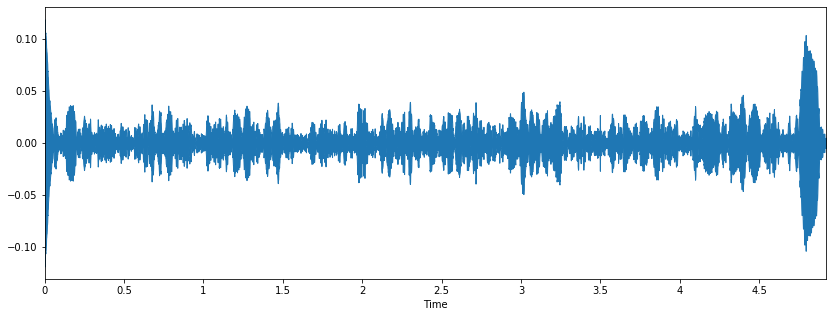

In [22]:
#Audio Before Preprocessing
audio , sfreq = lr.load(audio_files[0])
plt.figure(figsize=(14, 5))
lr.display.waveplot(audio, sr=sfreq)
ipd.Audio(audio_files[0])

In [23]:
#High- Pass Filter
from scipy.io import wavfile
from scipy import signal
sr,x = wavfile.read(audio_files[0])
b = signal.firwin(101, cutoff=1300, fs=sr, pass_zero=False)
x = signal.lfilter(b, [1.0], x)
wavfile.write('filtered.wav', sr, x.astype(np.int16))

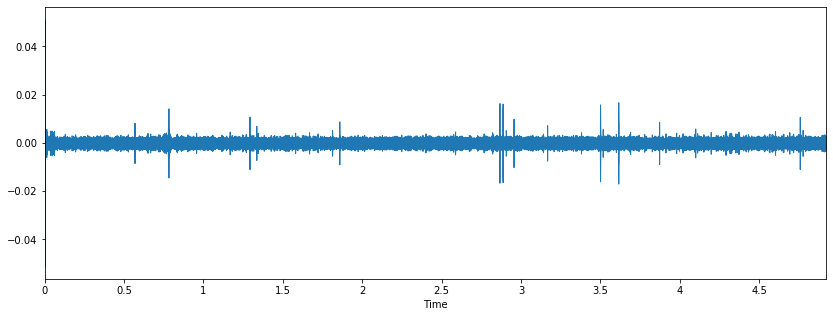

In [24]:
audio , sfreq = lr.load('filtered.wav')
plt.figure(figsize=(14, 5))
lr.display.waveplot(audio, sr=sfreq)
ipd.Audio('filtered.wav')

In [25]:
#Normalization
from pydub import effects, AudioSegment  
_sound = AudioSegment.from_file("filtered.wav", "wav")  
sound = effects.normalize(_sound)  
sound.export("normalize.wav", format="wav")

<_io.BufferedRandom name='normalize.wav'>

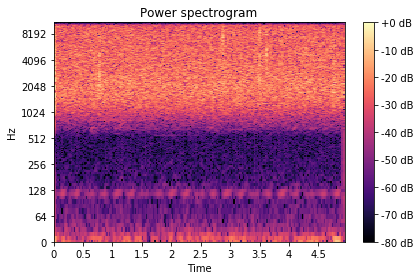

In [26]:
audio , sfreq = lr.load('normalize.wav')
D = np.abs(librosa.stft(audio,window ='hamm'))
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

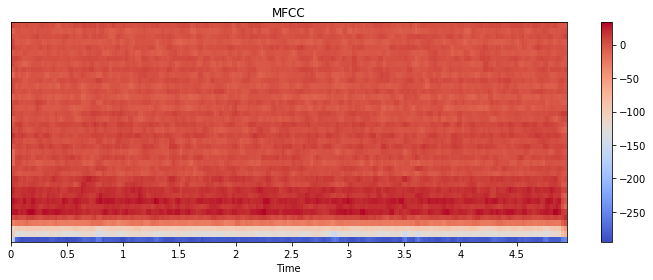

In [27]:
y, sr = lr.load('normalize.wav')
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()